In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from contextlib import contextmanager
%matplotlib inline

@contextmanager
def timer(name):
    s = time.time()
    yield
    e = time.time() - s
    print(f"[{name}] {e:.3f}sec")

In [2]:
%%capture
!pip install yfinance

In [3]:
df = pd.read_feather('../input/time-price-matrix/prices.f')
df.head()

,time_id,stock_id=0,stock_id=1,stock_id=2,stock_id=3,stock_id=4,stock_id=5,stock_id=6,stock_id=7,stock_id=8,...,stock_id=115,stock_id=116,stock_id=118,stock_id=119,stock_id=120,stock_id=122,stock_id=123,stock_id=124,stock_id=125,stock_id=126
0,5,193.732286,152.520145,123.543564,226.108032,621.378370,742.354690,371.177345,246.000235,284.359593,...,88.208286,246.723765,211.299950,66.260727,96.310080,142.421188,108.379948,84.392435,53.396614,310.689185
1,11,199.254347,149.529554,128.659632,250.406209,616.809412,769.597064,413.231921,256.925207,278.691296,...,90.297180,275.941053,213.995102,63.072241,101.311691,137.068758,105.517082,91.180522,55.886795,301.748489
2,16,209.192219,104.988836,118.818810,164.805658,534.306242,586.615944,236.966328,208.154045,123.725782,...,70.051006,189.787511,281.025394,53.532916,74.565404,93.414343,77.457138,55.079501,53.092456,194.631276
3,31,216.201237,137.857157,138.425875,236.298817,660.520315,806.596923,360.026094,261.327352,194.631276,...,90.736701,257.319264,235.635056,61.275442,90.982733,134.865080,103.755201,92.487409,58.133112,259.709226
4,62,214.542404,140.748456,137.293093,238.312727,640.351756,769.597064,403.298462,250.780508,188.085381,...,89.145675,248.183669,231.729503,59.578182,87.977011,125.484039,103.563062,96.089439,57.377620,259.709226


In [4]:
import yfinance as yf

In [5]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/S%26P_100')[2].Symbol.to_list()
df_prices_all = yf.download(tickers, start='2020-01-01', interval='1h')

[*********************100%***********************]  101 of 101 completed

1 Failed download:
- BRK.B: No data found, symbol may be delisted


In [6]:
dfp = df_prices_all.copy()
dfp.columns = ['_'.join(c) for c in df_prices_all.columns]
df_real_prices = dfp[[c for c in dfp.columns if 'Adj Close' in c]]
df_real_prices.columns = [c.split('_')[1] for c in df_real_prices.columns]
df_real_prices.head()

,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMGN,AMT,AMZN,AVGO,...,UNH,UNP,UPS,USB,V,VZ,WBA,WFC,WMT,XOM
2020-01-02 09:30:00-05:00,74.385002,89.029999,86.144997,210.460007,332.179993,51.279999,239.990005,230.210007,1868.880127,319.582001,...,291.190002,180.130005,116.464996,59.080002,190.039993,61.080002,59.130001,53.590000,119.379997,70.565002
2020-01-02 10:30:00-05:00,74.527496,89.440002,86.099998,209.985001,332.660004,51.340000,240.070007,229.639999,1869.180054,318.417511,...,291.579987,180.470001,115.855003,59.139999,190.169998,61.029999,59.189999,53.802502,119.175003,70.775002
2020-01-02 11:30:00-05:00,74.571251,89.150002,86.042801,209.705002,332.790009,51.500000,239.845596,228.450104,1874.489502,319.350006,...,290.760010,180.539993,115.750000,59.285000,190.235001,60.825001,59.166401,53.950001,118.785004,70.895203
2020-01-02 12:30:00-05:00,74.623474,89.050003,86.290001,209.264999,332.614990,51.450001,239.369995,228.690002,1876.614990,319.529999,...,290.029999,180.289993,115.519997,59.085701,190.205002,60.830002,59.049999,53.764999,118.860001,70.809998
2020-01-02 13:30:00-05:00,74.672501,89.040001,86.790001,209.268295,332.899994,51.490002,239.660004,228.925003,1893.500000,320.660004,...,291.209991,180.423996,115.739998,59.105000,190.690002,60.840000,58.834900,53.799999,118.864998,70.745003


In [7]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import minmax_scale

def get_neighbors(df_src):
    df_ = df_src.set_index('time_id')
    df_ = pd.DataFrame(df_.fillna(df_.mean()))
    df_.head()

    nn = NearestNeighbors(n_neighbors=300, p=2)
    nn.fit(df_)
    neighbors = nn.kneighbors(df_, return_distance=False)
    return neighbors


def sort_manifold(df, clf):
    df_ = df.set_index('time_id')
    df_ = pd.DataFrame(minmax_scale(df_.fillna(df_.mean())))

    X_compoents = clf.fit_transform(df_)

    dft = df.reindex(np.argsort(X_compoents[:,0])).reset_index(drop=True)
    # AMZN
    plt.plot(dft['stock_id=61'])
    plt.plot(dft['stock_id=37'])
    plt.plot(dft['stock_id=113'])
    return np.argsort(X_compoents[:, 0]), X_compoents
    

[t-SNE(400) -> 50] 827.695sec


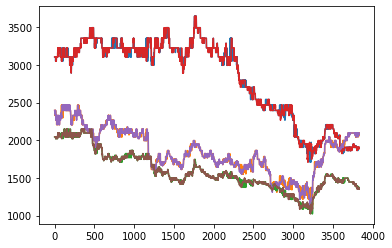

In [8]:
from sklearn.manifold import TSNE

if False:
    with timer('t-SNE(50)'):
        clf = TSNE(n_components=1, perplexity=100, random_state=0)
        sort_manifold(df, clf)

    with timer('t-SNE(200)'):
        clf = TSNE(n_components=1, perplexity=200, random_state=0)
        sort_manifold(df, clf)

    with timer('t-SNE(400)'):
        clf = TSNE(n_components=1, perplexity=400, random_state=0)
        order, X_compoents = sort_manifold(df, clf)

with timer('t-SNE(400) -> 50'):
    clf = TSNE(n_components=1, perplexity=400, random_state=0, n_iter=2000)
    order, X_compoents = sort_manifold(df, clf)
    clf = TSNE(n_components=1, perplexity=50, random_state=0, init=X_compoents, n_iter=2000, method='exact')
    order, X_compoents = sort_manifold(df, clf)


In [9]:
df_ordered = df.reindex(order).reset_index(drop=True)
if df_ordered['stock_id=61'].iloc[0] > df_ordered['stock_id=61'].iloc[-1]:
    df_ordered = df_ordered.reindex(df_ordered.index[::-1]).reset_index(drop=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


8216.632471621313


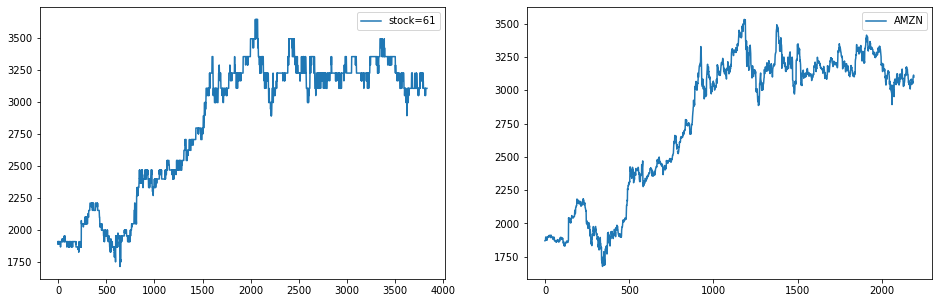

In [10]:
from scipy import interpolate

df_interpolated = pd.DataFrame()

for c in df_real_prices.columns:
    df_interpolated[c] = interpolate.interp1d(np.linspace(0, 3830, 2191), df_real_prices[c].iloc[:2191].values)(np.arange(3830))
    
def find_match(stock_id):
    best_col = None
    best_score = 1e30
    
    for c in df_interpolated.columns:
        score = np.nanmean(np.power(df_interpolated[c].values - df_ordered[f'stock_id={stock_id}'].values, 2))
        if score < best_score:
            best_score = score
            best_col = c
            
    return best_col, best_score

def compare_plot(stock_id, stock_name):
    fig = plt.figure(figsize=(16,5))
    ax1 = fig.add_subplot(121)
    ax1.plot(df_ordered[f'stock_id={stock_id}'], label=f'stock={stock_id}')
    ax1.legend()
    ax2 = fig.add_subplot(122)
    ax2.plot(df_real_prices[stock_name].iloc[:2191].values, label=stock_name)
    ax2.legend()

def auto_compare_plot(stock_id):
    stock_name, score = find_match(stock_id)
    print(score)
    compare_plot(stock_id, stock_name)

auto_compare_plot(61)#, 'AMZN')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


1266.783879343004


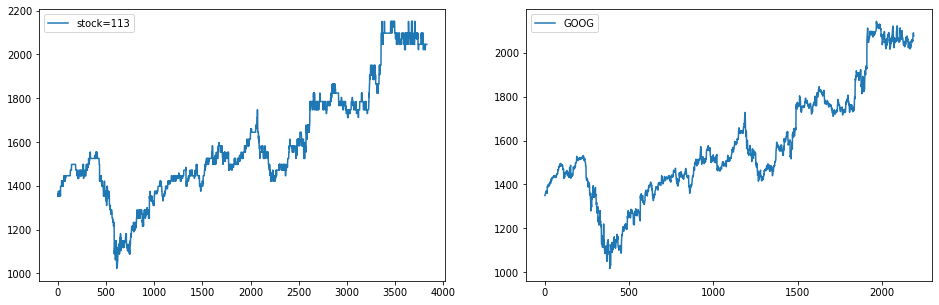

In [11]:
auto_compare_plot(113)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


4036.162012774893


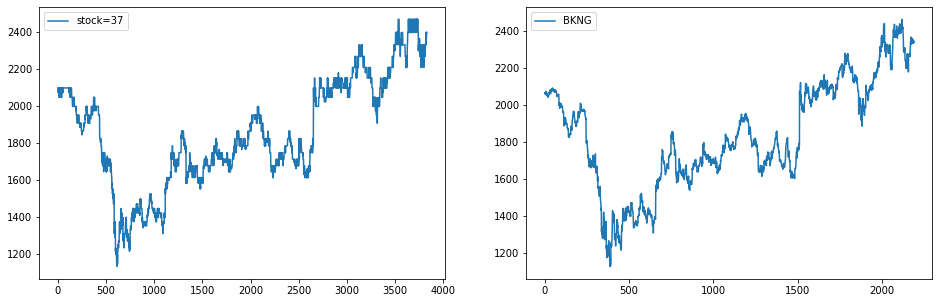

In [12]:
auto_compare_plot(37)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


180.14263727727754


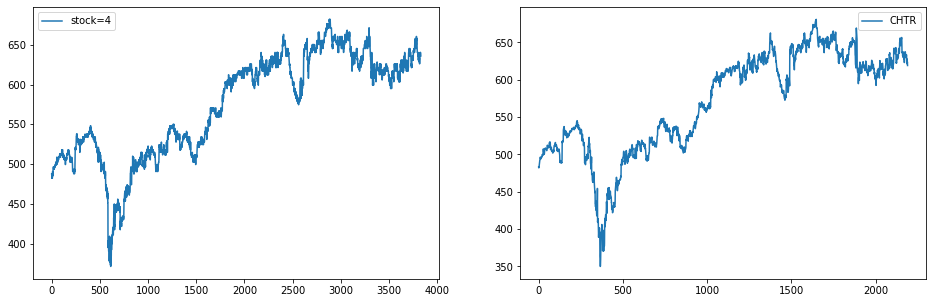

In [13]:
auto_compare_plot(4)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


27.980433825806703


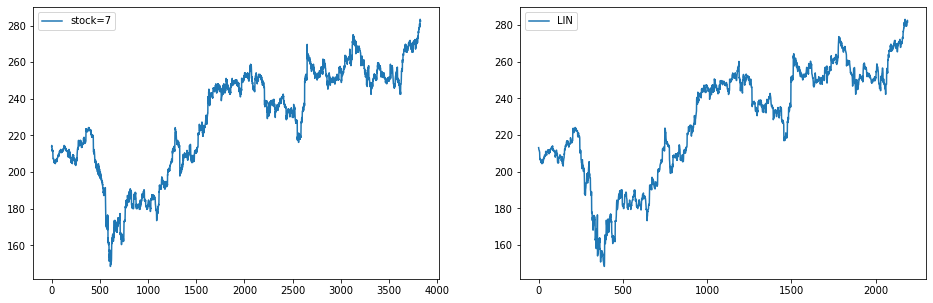

In [14]:
auto_compare_plot(7)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice
  del sys.path[0]


3.2623726433793734


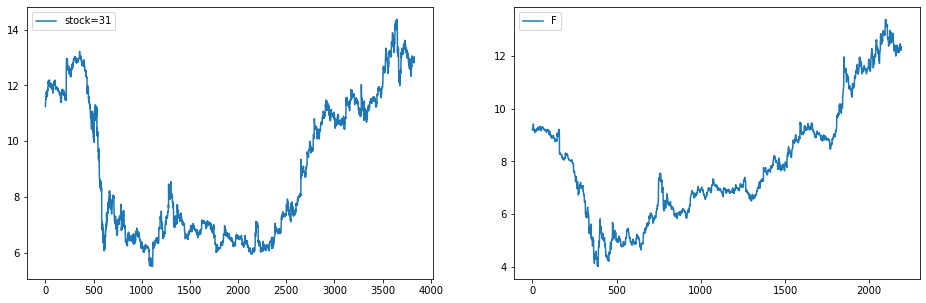

In [15]:
auto_compare_plot(31)

In [16]:
df_ordered['time_id'].to_csv('time_id_order.csv', index=False)